In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
import itertools
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
mystem = Mystem()
russian_stopwords = stopwords.words("russian")


# FIRST: Preprocessing
def preprocess_text(text):
    # 1. lowercase all words
    # 2. Lemmatize - interpret different forms of the same word as one word
    tokens = mystem.lemmatize(text.lower())
    # 3. Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in russian_stopwords \
              and token != " " \
              and token.strip() not in punctuation]
    text = " ".join(tokens)

    return text

In [44]:
tokens = mystem.lemmatize(('Hyakki Yakkō 03/11/19\nБлуждаем в дыму, соверш').lower())
print(tokens)

['hyakki', ' ', 'yakkō', ' ', '03', '/', '11', '/', '19', '\n', 'блуждать', ' ', 'в', ' ', 'дым', ', ', 'соверша', '\n']


In [45]:
def standardize_text(df, text_field):
#     df[text_field] = df[text_field].str.replace(r"http\S+", "")
#     df[text_field] = df[text_field].str.replace(r"http", "")
#     df[text_field] = df[text_field].str.replace(r"@\S+", "")
#     df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
#     df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].apply(lambda row: mystem.lemmatize(str(row.lower())))
    return df



In [46]:
"""   APPLY PREPROCESSING   """
data = pd.read_csv('E:/INEVENTZ/DATA/All_data.csv')
data_short = data.iloc[:100]
print(data_short.shape)
data_short['text'] = data_short['text'].apply(lambda row: preprocess_text(str(row)))
print(data_short.head())
print("All Data: ", data_short.shape)
#data['text'] = data['text'].apply(lambda row: preprocess_text(str(row)))
data_short.to_csv("E:/INEVENTZ/DATA/data_short_no_sw.csv", index=None, header=True)


(100, 2)
                                                text  label
0  20 декабрь устраивать небольшой бунт мачта 20 ...      1
1  hyakki yakkō 03 11 19 блуждать дым совершать т...      1
2  дело дело 04 09 учиться делать трансляция пить...      1
3  hyakki yakō 3 ноябрь 21 00 рубинштейн 28 мотив...      1
4  субботний теплый вечер встречаться wod grafikk...      1
All Data:  (100, 2)


E:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [47]:
data = pd.read_csv('E:/INEVENTZ/DATA/data_short_no_sw.csv')

In [48]:
print(data.shape)

(100, 2)


In [49]:
# Create list of all WORDS in dataset
all_words = [i.split(' ') for i in data["text"]]
all_words = list(itertools.chain.from_iterable(all_words))


# Count length of each sentence in dataset
sentence_lengths = [len(tokens) for tokens in data["text"]]

# Create list of all UNIQUE words
VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

994 words total, with a vocabulary size of 582
Max sentence length is 308


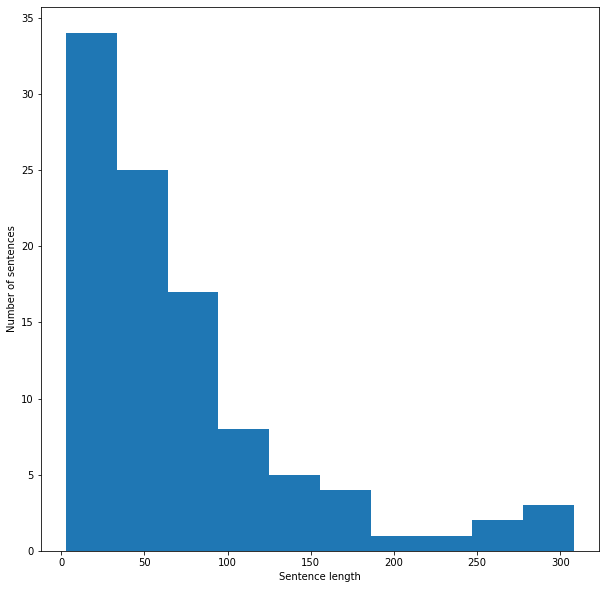

In [50]:
# PLot hist
fig = plt.figure(figsize=(10, 10))
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()


In [55]:
print(data.label.value_counts())

0    75
1    25
Name: label, dtype: int64


In [63]:
# Create bag of words

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)
    print("EMB: ", emb)
    print("Count_Vectorizer: ", count_vectorizer)
    return emb, count_vectorizer

list_text = data["text"].tolist()
list_labels = data["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_text, list_labels, test_size=0.5,
                                                                                random_state=40)

In [64]:
# Count Unique values in train_y and test_y lists

from collections import Counter
print(Counter(y_train).keys()) # equals to list(set(words))
print(Counter(y_test).values())

dict_keys([0, 1])
dict_values([38, 12])


In [65]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)


EMB:    (0, 279)	1
  (0, 225)	1
  (1, 39)	1
  (1, 70)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 80)	1
  (1, 109)	1
  (1, 263)	1
  (1, 284)	1
  (1, 247)	1
  (2, 248)	1
  (2, 140)	1
  (2, 124)	1
  (2, 306)	1
  (2, 227)	1
  (2, 199)	1
  (2, 317)	1
  (2, 134)	1
  (2, 137)	1
  (2, 316)	1
  (2, 139)	1
  (2, 242)	1
  (2, 37)	1
  :	:
  (45, 184)	1
  (45, 22)	1
  (45, 260)	1
  (46, 231)	1
  (46, 31)	1
  (46, 148)	1
  (46, 5)	1
  (47, 173)	1
  (47, 51)	1
  (47, 72)	1
  (47, 68)	1
  (47, 195)	1
  (47, 159)	1
  (48, 306)	1
  (48, 27)	1
  (48, 231)	1
  (48, 233)	1
  (48, 271)	1
  (48, 60)	1
  (48, 17)	1
  (48, 19)	1
  (49, 280)	1
  (49, 274)	1
  (49, 130)	1
  (49, 184)	1
Count_Vectorizer:  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                stri

In [69]:
from sklearn.linear_model import LogisticRegression
from joblib import dump

# clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
#                          multi_class='multinomial', n_jobs=-1, random_state=40)
clf = LogisticRegression()
clf.fit(X_train_counts, y_train)
dump(clf, 'E:/INEVENTZ/weights/logreg.joblib')
y_predicted_counts = clf.predict(X_test_counts)


In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                average='weighted')
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                          average='weighted')

    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1


accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))


accuracy = 0.840, precision = 0.868, recall = 0.840, f1 = 0.808


In [ ]:
from joblib import load

def test(text: str):
    clf = load('E:/INEVENTZ/weights/logreg.joblib')
    